In [1]:
!pip install opendatasets --quiet

In [2]:
import opendatasets as od 

url = (
    "https://www.kaggle.com/competitions/jigsaw-unintended-"
    "bias-in-toxicity-classification/data"
)

od.download(url)

100%|██████████| 723M/723M [00:08<00:00, 88.4MB/s]



Extracting archive ./jigsaw-unintended-bias-in-toxicity-classification/jigsaw-unintended-bias-in-toxicity-classification.zip to ./jigsaw-unintended-bias-in-toxicity-classification


In [3]:
!ls -lh jigsaw-unintended-bias-in-toxicity-classification

total 2.3G
-rw-r--r-- 1 root root 874M Jan  5 10:45 all_data.csv
-rw-r--r-- 1 root root 102M Jan  5 10:45 identity_individual_annotations.csv
-rw-r--r-- 1 root root 1.2M Jan  5 10:45 sample_submission.csv
-rw-r--r-- 1 root root  29M Jan  5 10:45 test.csv
-rw-r--r-- 1 root root  43M Jan  5 10:45 test_private_expanded.csv
-rw-r--r-- 1 root root  43M Jan  5 10:45 test_public_expanded.csv
-rw-r--r-- 1 root root 399M Jan  5 10:45 toxicity_individual_annotations.csv
-rw-r--r-- 1 root root 779M Jan  5 10:45 train.csv


In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


df = pd.read_csv("./jigsaw-unintended-bias-in-toxicity-classification/train.csv")

In [5]:
df.sample(5)

id    target                                       comment_text  \
1312240  5718915  0.000000                           We need to build a wall.   
446988    791218  0.166667                       Will it REALLY be your last?   
474120    825582  0.300000  This is one of those letters you write, put in...   
737962   5024523  0.000000  All these cuts because the legislature gave ou...   
899889   5220730  0.600000  Fake new outlet?\n\nG. S. deAuxerre --> MUTED....   

         severe_toxicity  obscene  identity_attack  insult    threat  asian  \
1312240              0.0      0.0              0.0     0.0  0.000000    0.0   
446988               0.0      0.0              0.0     0.0  0.166667    NaN   
474120               0.0      0.0              0.1     0.2  0.000000    0.0   
737962               0.0      0.0              0.0     0.0  0.000000    NaN   
899889               0.0      0.0              0.0     0.6  0.000000    NaN   

         atheist  bisexual  black  buddhist  christian  female  heterosexual  \
1312240      0.0       0.0    0.0       0.0   0.000000     0.0           0.0   
446988       NaN       NaN    NaN       NaN        NaN     NaN           NaN   
474120       0.0       0.0    0.0       0.0   0.166667     0.0           0.0   
737962       NaN       NaN    NaN       NaN        NaN     NaN           NaN   
899889       NaN       NaN    NaN       NaN        NaN     NaN           NaN   

         hindu  homosexual_gay_or_lesbian  \
1312240    0.0                        0.0   
446988     NaN                        NaN   
474120     0.0                        0.0   
737962     NaN                        NaN   
899889     NaN                        NaN   

         intellectual_or_learning_disability  jewish  latino  male  muslim  \
1312240                                  0.0     0.0     0.0   0.0     0.0   
446988                                   NaN     NaN     NaN   NaN     NaN   
474120                                   0.0     0.0     0.0   0.0     0.0   
737962                                   NaN     NaN     NaN   NaN     NaN   
899889                                   NaN     NaN     NaN   NaN     NaN   

         other_disability  other_gender  other_race_or_ethnicity  \
1312240               0.0           0.0                      0.0   
446988                NaN           NaN                      NaN   
474120                0.0           0.0                      0.0   
737962                NaN           NaN                      NaN   
899889                NaN           NaN                      NaN   

         other_religion  other_sexual_orientation  physical_disability  \
1312240             0.0                       0.0                  0.0   
446988              NaN                       NaN                  NaN   
474120              0.0                       0.0                  0.0   
737962              NaN                       NaN                  NaN   
899889              NaN                       NaN                  NaN   

         psychiatric_or_mental_illness  transgender  white  \
1312240                            0.0          0.0    0.0   
446988                             NaN          NaN    NaN   
474120                             0.0          0.0    0.0   
737962                             NaN          NaN    NaN   
899889                             NaN          NaN    NaN   

                          created_date  publication_id  parent_id  article_id  \
1312240  2017-08-05 14:40:31.297546+00              54        NaN      363161   
446988   2017-01-05 00:50:06.642803+00              53   788966.0      159788   
474120   2017-01-11 20:12:47.609490+00              53        NaN      161267   
737962   2017-03-19 03:23:12.611980+00              21        NaN      319508   
899889   2017-05-05 19:56:17.340196+00              54  5220342.0      332268   

           rating  funny  wow  sad  likes  disagree  sexual_explicit  \
1312240  rejected      0    0    0      0    

In [6]:
df.shape

(1804874, 45)

In [7]:
df.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [9]:
df.isna().sum()

id                                           0
target                                       0
comment_text                                 0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

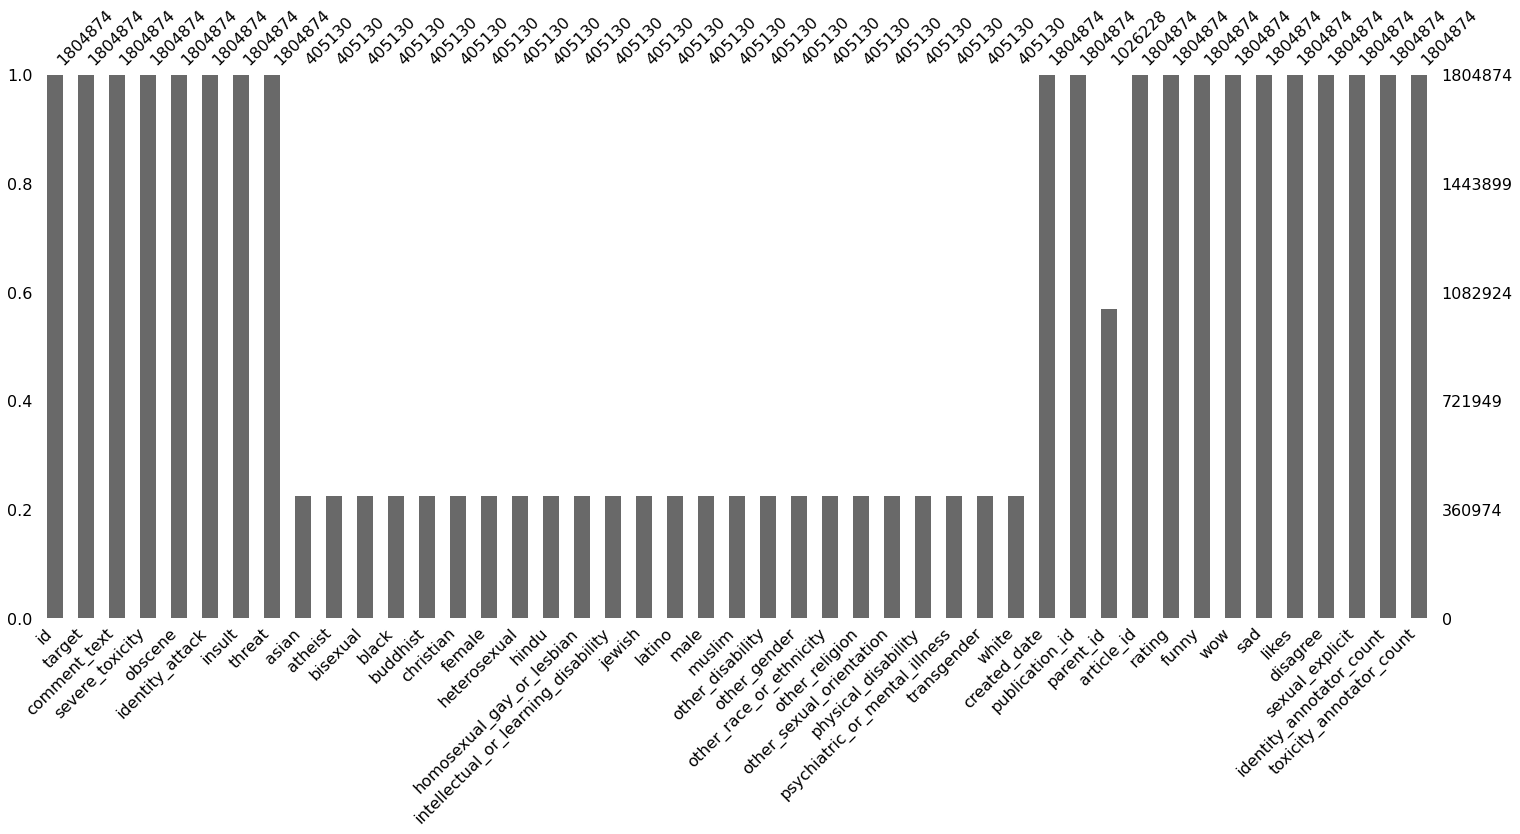

In [10]:
import missingno as msno

msno.bar(df)

In [20]:
df = df.drop(
    columns=['id', 'target', 'created_date', 
             'publication_id', 'parent_id', 'article_id', 
             'rating', 'identity_annotator_count', 'toxicity_annotator_count']
    )

df.columns

Index(['comment_text', 'severe_toxicity', 'obscene', 'identity_attack',
       'insult', 'threat', 'asian', 'atheist', 'bisexual', 'black', 'buddhist',
       'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit'],
      dtype='object')

In [21]:
X = df['comment_text']
y = df.iloc[:, 1:]

In [22]:
y.columns

Index(['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat',
       'asian', 'atheist', 'bisexual', 'black', 'buddhist', 'christian',
       'female', 'heterosexual', 'hindu', 'homosexual_gay_or_lesbian',
       'intellectual_or_learning_disability', 'jewish', 'latino', 'male',
       'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity',
       'other_religion', 'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit'],
      dtype='object')

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' '
)

tokenizer.fit_on_texts(X)
print("Data fitted on the tokenizer")

Data fitted on the tokenizer


In [24]:
n_vocab = len(tokenizer.word_index.items()) + 1
print(f"Vocabulary size: {n_vocab}")

print("\nWords at the top")
print('\t', dict(list(tokenizer.word_index.items())[:10]))
print("\nWords at the bottom")
print('\t', dict(list(tokenizer.word_index.items())[-10:]))

Vocabulary size: 397709

Words at the top
	 {'the': 1, 'to': 2, 'and': 3, 'of': 4, 'a': 5, 'is': 6, 'in': 7, 'that': 8, 'for': 9, 'you': 10}

Words at the bottom
	 {'mxcarthyism': 397699, 'socioligists': 397700, 'sociologyguide': 397701, 'kyrcakyyeg4': 397702, 'nonadult': 397703, 'googooes': 397704, 'salman’s': 397705, 'viny': 397706, 'nondisabled': 397707, '1412': 397708}
